# Capstone Project 2 - Fake News Detection

## Introduction

We live in a post-truth world, where misinformation seems to increase all the time. We need a way to identify misinformation, apart from exhaustive, deep research on everything we read. Besides a few heuristics, can we go deeper with statistics and machine learning? This analysis shows that we can.

## Preprocessing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

#getnews and datascience are custom python modules to avoid cluttering the notebook with source code
import getnews as news
import datascience as data

from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
warnings.simplefilter(action='ignore', category=FutureWarning)

dir_pol_real = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/'
dir_pol_fake = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/'
dir_gos_real = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/'
dir_gos_fake = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/'
directory_list = [dir_pol_real,dir_pol_fake,dir_gos_real,dir_gos_fake]

## Get Data

In [2]:
df_pol_real = news.getnews(dir_pol_real)
df_pol_real.head()

,title,text,authors,num_images,domain,url
0,Local News Headlines Hawaii,If you want to do business with Miller Industr...,['Dan Nakaso Dnakaso Staradvertiser.Com On Apr...,19,starbulletin,http://www.starbulletin.com/news/bulletin/9467...
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...
2,One in Four,One in Four\n\nCongressman Joe Pitts Blocked U...,['Congressman Joe Pitts'],4,medium,https://medium.com/@RepJoePitts/one-in-four-66...
3,,,[],0,politico,http://www.politico.com/news/stories/0309/2034...
4,,,[],0,fec,http://docquery.fec.gov/pdf/613/20180415910815...


In [3]:
df_pol_fake = news.getnews(dir_pol_fake)
df_pol_fake.head()

,title,text,authors,num_images,domain,url
0,Cannibals Arrested in Florida Claim Eating Hum...,"Police in Vernal Heights, Florida, arrested 3-...",['Daily Buzz Live'],17,dailybuzzlive,dailybuzzlive.com/cannibals-arrested-florida/
1,BREAKING: Trump fires Deputy Attorney General ...,"WASHINGTON — Rod Jay Rosenstein, Deputy Attorn...",[],23,archive,https://web.archive.org/web/20171228192703/htt...
2,Keanu Reeves Shook The World With Another POWE...,Sign up for your daily dose of enlightenment a...,['Higher Perspective'],5,higherperspectives,www.higherperspectives.com/powerful-note-16453...
3,Eveningw.com,,[],0,eveningw,http://eveningw.com/breaking-woman-says-offere...
4,"First family visits D.C. shelter, highlights h...","\n\nPresident Obama, alongside his family, ser...","['Juliet Eilperin', 'Reporter Covering Domesti...",4,washingtonpost,https://www.washingtonpost.com/news/post-polit...


In [4]:
df_pol_fake.shape

(328, 6)

In [5]:
df_gos_real = news.getnews(dir_gos_real)
df_gos_real.head()

,title,text,authors,num_images,domain,url
0,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,When you get married on national TV (and who i...,[],7,brides,https://www.brides.com/story/teen-mom-jenelle-...
1,Kylie Jenner refusing to discuss Tyga on Life ...,Kylie Jenner reportedly doesn't want to talk a...,['Ross Mcdonagh For Dailymail.Com'],455,dailymail,https://www.dailymail.co.uk/tvshowbiz/article-...
2,Quinn Perkins,Character on American television series Scanda...,[],6,wikipedia,https://en.wikipedia.org/wiki/Quinn_Perkins
3,I Tried Kim Kardashian's Butt Workout & Am For...,Health Trends\n\nCanicross Is A New Fitness Tr...,"['Elizabeth Buxton', 'Megan Decker', 'Cory Sti...",6,refinery29,https://www.refinery29.com/en-us/2018/03/19192...
4,Celine Dion donates concert proceeds to Vegas ...,(CNN) An emotional Celine Dion returned to the...,['Sandra Gonzalez'],5,cnn,https://www.cnn.com/2017/10/04/entertainment/c...


In [6]:
df_gos_real.shape

(16190, 6)

In [7]:
df_gos_fake = news.getnews(dir_gos_fake)
df_gos_fake.head()

,title,text,authors,num_images,domain,url
0,Did Miley Cyrus and Liam Hemsworth secretly ge...,Congratulations might be in order for Miley Cy...,['Caitlyn Hitt'],453,dailymail,www.dailymail.co.uk/tvshowbiz/article-5874213/...
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...,Paris Jackson and Cara Delevingne were spotted...,"['Courteney Larocca', 'Weekend Editor']",17,hollywoodlife,hollywoodlife.com/2018/05/05/paris-jackson-car...
2,Celebrities Join Tax March in Protest of Donal...,Thousands are taking the streets to protest Pr...,"['Variety Staff', 'Follow Us On Twitter', ""Var...",36,variety,variety.com/2017/biz/news/tax-march-donald-tru...
3,Cindy Crawford's daughter Kaia Gerber wears a ...,We'd venture to say that Cindy Crawford's daug...,"['Carly Stern For Dailymail.Com', 'Jj Nattrass...",416,dailymail,www.dailymail.co.uk/femail/article-3499192/Do-...
4,Full List of 2018 Oscar Nominations – Variety,Follow Us on Twitter\n\nOscar nominations for ...,"['Variety Staff', 'Follow Us On Twitter', ""Var...",35,variety,variety.com/2018/film/news/list-2018-oscar-nom...


In [8]:
df_gos_fake.shape

(4899, 6)

## Clean Data

In [9]:
#remove rows that have no text in the text column
df_pol_real = news.cleandf(df=df_pol_real,col='text',exclude='')
df_pol_fake = news.cleandf(df=df_pol_fake,col='text',exclude='')
df_gos_real = news.cleandf(df=df_gos_real,col='text',exclude='')
df_gos_fake = news.cleandf(df=df_gos_fake,col='text',exclude='')

df_list = [df_pol_real,df_pol_fake,df_gos_real,df_gos_fake]

#Add response variable 'class' based on True=1 or Fake=0
df_pol_real['class'] = 1 #True
df_pol_fake['class'] = 0 #Fake
df_gos_real['class'] = 1
df_gos_fake['class'] = 0

#combine df's into one
df = pd.concat(df_list).reset_index(drop=True)
tot_articles = df.shape[0]

In [10]:
df.head()

,title,text,authors,num_images,domain,url,class
0,Local News Headlines Hawaii,If you want to do business with Miller Industr...,['Dan Nakaso Dnakaso Staradvertiser.Com On Apr...,19,starbulletin,http://www.starbulletin.com/news/bulletin/9467...,1
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,1
2,One in Four,One in Four\n\nCongressman Joe Pitts Blocked U...,['Congressman Joe Pitts'],4,medium,https://medium.com/@RepJoePitts/one-in-four-66...,1
3,Pastors To Protest IRS Rules on Political Advo...,"On Sept. 28, pastors from 20 states will give ...",[],4,pewforum,http://www.pewforum.org/2008/09/19/pastors-to-...,1
4,“Dictionary” on President Obama’s Health Care ...,WASHINGTON – The Republican National Committee...,"['Written On September', 'Republican National ...",32,archive,https://web.archive.org/web/20091003005639/htt...,1


In [11]:
df['authors'].unique().shape

(5558,)

## EDA

### Word Counts

Find the top 15 words by dataset/real or fake

In [12]:
words = []
for item in df_list:
    words.append(list(data.cleanwordcounts(item.text).word.head(15)))

In [13]:
df_words = pd.DataFrame(words).T
df_words.columns = ['Politifact-Real','Politifact-Fake','Gossipcop-Real','Gossipcop-Fake']
df_words

,Politifact-Real,Politifact-Fake,Gossipcop-Real,Gossipcop-Fake
0,people,trump,one,said
1,going,said,said,one
2,think,president,like,time
3,president,people,new,new
4,would,one,time,like
5,know,would,also,year
6,said,also,first,also
7,0,news,show,first
8,one,new,year,source
9,1,us,season,would


There is a lot of crossover between real and fake in terms of top words, comparing between both politifact and gossipcop. It appears that there is a lot of fake news dealing with President Trump. Could this indicate a bias in the media directed at Trump? This question is beyond the scope of this analysis, but is good food for thought.

### Domains

In [14]:
#top 15 news publishers
domains = pd.DataFrame(df['domain'].value_counts())
domains.columns = ['count']
domains.head(15)

,count
people,1783
dailymail,964
wikipedia,739
usmagazine,709
etonline,656
longroom,556
hollywoodlife,524
usatoday,344
hollywoodreporter,329
variety,304


Text(0.5, 1.0, 'Domains - Count')

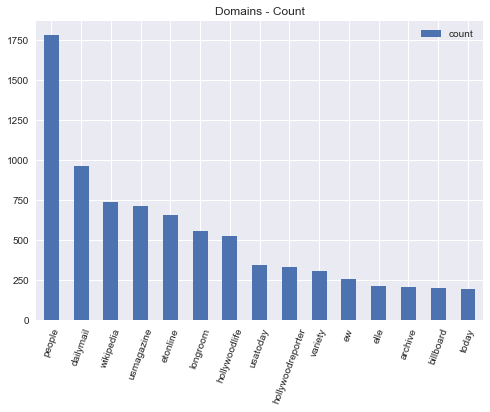

In [40]:
plt.style.use('seaborn')
domains.head(15).plot(kind='bar')
plt.xticks(rotation=70)
plt.title('Domains - Count')

In [16]:
#what domains are common between the two datasets?
polset = set(df_pol_real.domain.unique()).union(set(df_pol_fake.domain.unique()))
gosset = set(df_gos_real.domain.unique()).union(set(df_gos_fake.domain.unique()))
intersect = polset.intersection(gosset)
print(intersect)

{'archive', 'latimes', 'rollingstone', 'cbsnews', 'usnews', 'thehill', 'foxnews', 'cnn', 'vox', 'breitbart', 'bbc', 'reuters', 'businessinsider', 'politico', 'mirror', 'theguardian', 'apnews', 'realclearpolitics', 'genius', 'nymag', 'mtv', 'nbcnews', 'independent', 'time', 'reddit', 'radaronline', 'medium', 'tampabay', 'infowars', 'theverge', 'aljazeera', 'rare', 'steemit', 'thesun', 'washingtonpost', 'npr', 'boston', 'wsj', 'hollywoodreporter', 'guardian', 'trendolizer', 'nytimes', 'usatoday', 'msn', 'inverse', 'desmoinesregister', 'boingboing', 'huffingtonpost', 'pix11', 'unilad', 'cbslocal', 'go', 'firstpost', 'bloomberg', 'pbs', 'me', 'wordpress', 'chicagotribune', 'yournewswire', 'nypost'}


Many of the well known publishers show up both sets, however there are a few relatively unknown domains like boingboing and pixll that are in both.

### Number of Images

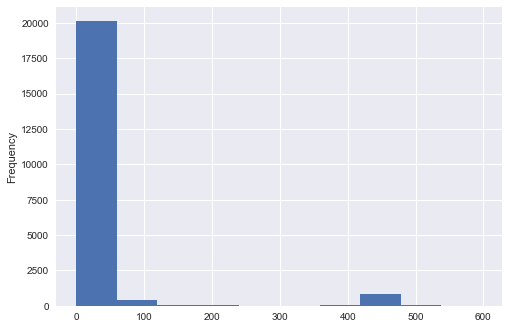

In [17]:
df.num_images.plot(kind='hist')
plt.savefig('./Images/images.png',format='png')

Most articles have less than 50 images, but there is a strange blip between 400 and 500.

In [18]:
df['num_images'].describe()

count    21628.000000
mean        34.610505
std         90.292931
min          0.000000
25%          6.000000
50%         11.000000
75%         22.000000
max        598.000000
Name: num_images, dtype: float64

Do fake news articles use more or less images than real news articles?

In [19]:
image_by_class = pd.pivot_table(df,index='class',aggfunc={'num_images':['mean','std']})
print(image_by_class)

      num_images           
            mean        std
class                      
0      31.761088  82.660956
1      35.483661  92.490461


It appears at first inspection that fake news articles use fewer images than real news articles overall. This makes sense as fake images take more effort to create as one must obtain original images and doctor them or generate them from scratch for fake news. They may also distract from the theme of the fake news text, which is the idea that the article is trying to get across. The image may be a distraction that could easily clue people in to the nature of the article

Let's run a bootstrap test to see if their is a statistical difference. One sided statistical test
H0: The means of the distributions of num_images between classes is the same
Ha: Real news articles use more images than fake news articles

significance level = 1%

In [20]:
class1 = df[df['class']==1]['num_images']
class0 = df[df['class']==0]['num_images']
diff = image_by_class.iloc[1,0] - image_by_class.iloc[0,0]
#generate 50000 samples of the difference of means between the two classes
perm_sample = data.draw_perm_reps(class1,class0,func=data.diff_of_means,size=50000)
print("Observed difference in means:",round(diff,2))

Observed difference in means: 3.72


(array([   47.,   449.,  2428.,  8014., 14188., 14321.,  7791.,  2348.,
          371.,    43.]),
 array([-5.6786984 , -4.54001821, -3.40133802, -2.26265783, -1.12397764,
         0.01470255,  1.15338274,  2.29206293,  3.43074312,  4.56942331,
         5.7081035 ]),
 <a list of 10 Patch objects>)

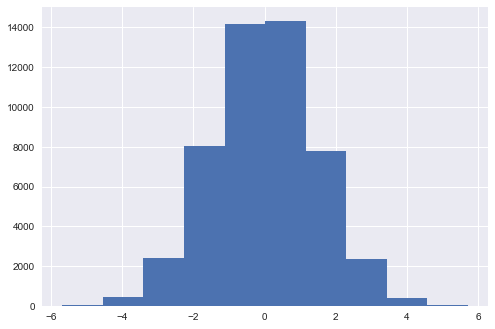

In [21]:
#histogram of the difference of means
plt.hist(perm_sample)

In [22]:
#calculate p-value
p_value = len(perm_sample[perm_sample >= diff]) / len(perm_sample)
p_value

0.00462

Our p-value is less than alpha value for a one-sided test. We reject the null in favor of the alternative hypothesis, there is a statistically significant difference in the number of images that the two types of news use.

### Worst Offenders and the Truth Tellers

Create a pivot table to visualize the counts of fake news and real news articles by domain, also compute a truthfulness ratio

In [23]:
#create df_sum dataframe to quantify the counts of true vs fake articles by domain, as well
#as the truthfulness of the site, given by %true column
df_sum = pd.pivot_table(df,index='domain',columns='class',fill_value=0,aggfunc={'domain':'count'})
df_sum['%true'] = df_sum.apply(lambda row: row[1]/(row[0]+row[1]),axis=1)
df_sum[(df_sum['%true']!=1)&(df_sum['%true']!=0)].sort_values(by='%true')

domain          %true
class                   0    1          
domain                                  
newidea               134    6  0.042857
radaronline           174   19  0.098446
hollywoodlife         460   64  0.122137
yourtango              14    2  0.125000
femalefirst            14    2  0.125000
thehollywoodgossip     42    8  0.160000
theatlantic             5    1  0.166667
girlfriend             10    2  0.166667
dailystar              10    2  0.166667
intouchweekly          75   17  0.184783
lifeandstylemag        52   12  0.187500
journalpost             4    1  0.200000
enstarz                 4    1  0.200000
business-standard       3    1  0.250000
contactmusic            3    1  0.250000
thenational             3    1  0.250000
datalounge              3    1  0.250000
gobankingrates          3    1  0.250000
heavy                   5    2  0.285714
marriedbiography       15    6  0.285714
tribune                 5    2  0.285714
facebook                5    2  0.285714
aceshowbiz             24   10  0.294118
ibtimes                61   27  0.306818
okmagazine             63   29  0.315217
wonderwall             19    9  0.321429
inquisitr             107   51  0.322785
player                  2    1  0.333333
calgarysun              2    1  0.333333
entertainmentdaily      4    2  0.333333
...                   ...  ...       ...
her                     1   11  0.916667
allure                  3   35  0.921053
justjaredjr             1   12  0.923077
today                  15  180  0.923077
tennessean              1   12  0.923077
politifact              2   24  0.923077
glamour                 7   88  0.926316
bravotv                11  147  0.930380
blogspot                2   29  0.935484
tvguide                 2   29  0.935484
hola                    1   15  0.937500
reuters                 1   15  0.937500
essence                 1   16  0.941176
newslocker              1   17  0.944444
bbc                     4   70  0.945946
popculture              4   74  0.948718
hellogiggles            4   75  0.949367
tvinsider               1   20  0.952381
w3livenews              1   21  0.954545
kardashiantoday         1   23  0.958333
wikia                   1   25  0.961538
stylecaster             1   29  0.966667
indiewire               1   30  0.967742
upi                     2   67  0.971014
biphoo                  1   34  0.971429
medium                  3  103  0.971698
theworldnews            1   40  0.975610
youtube                 1   46  0.978723
scoopnest               1   49  0.980000
tvline                  1   71  0.986111

[378 rows x 3 columns]

Pulling up the rear, we can see hollywoodlife and yourtango as some of the worst sites for fake news. On the other end, we can see more reputable sites like youtube and bbc mostly publish true stories. It is interesting to note the domains that have a proclivity for fake news, but each article should be judged on its own merit, not dismissed because it comes from a site that publishes lots of fake news articles. This would be an example of the genetic fallacy, and we want to avoid that.

In [67]:
#what is the purity of the dataset?
round(df_sum[(df_sum['%true']==1)|(df_sum['%true']==0)].shape[0] / df_sum.shape[0],2)

0.79

### Word Cloud

Let's generate a couple of word clouds to get a visual idea of the most common words from the Politifact sample.

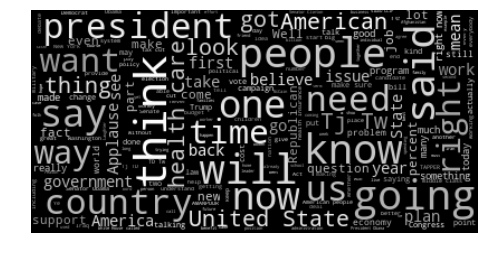

In [24]:
from wordcloud import WordCloud
import random
#build list of stop words
stop_words = stopwords.words('english')
#function to pass to color_func to change default wordcloud colors
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Generate a word cloud image for real news from Politifact sample
wc = WordCloud(max_words=200,stopwords=stop_words)
text_pol_real = df_pol_real.text.str.cat(sep=' ')
wordcloud = wc.generate(text_pol_real)

# Display the generated image:
# the matplotlib way:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text_pol_real)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.savefig('./Images/realwordcloud.png',format='png')
plt.show()

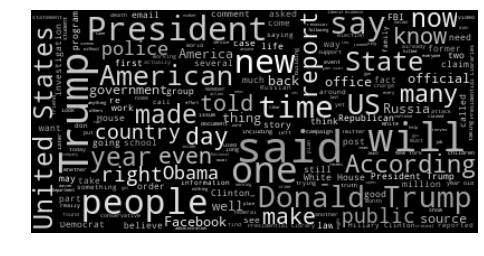

In [25]:
# Generate a word cloud image for Fake News from Politifact sample
wc = WordCloud(max_words=200,stopwords=stop_words)
text_pol_fake = df_pol_fake.text.str.cat(sep=' ')
wordcloud = wc.generate(text_pol_fake)

# Display the generated image:
# the matplotlib way:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text_pol_fake)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.savefig('./Images/fakewordcloud.png',format='png')
plt.show()

Now that we have explored our dataset using statistics and visualization, let's build our predictive models. We will use Naive Bayes with Bag of words as the benchmark for the BERT algorithm.

### Zipf's law

We want to run a statistical test to find whether our corpus follows the famous Zipf's law. We also want to see if using Zipf's law will help in detecting fake news by comparing the distribution of word tokens in our documents vs what we would expect assuming a Zipf distribution.

generate Zipf distribution using P(w) = 1 / R(w)^1.07

In [26]:
#generate word counts, real news
df_realcounts = data.wordcounts(df_pol_real.text)
df_realcounts.reset_index(drop=True,inplace=True)
#total word occurences
total = df_realcounts['counts'].sum()

In [27]:
#generate expected counts from zipf distribution
df_realcounts['zipf_counts'] = pd.Series(total/(np.array(range(len(df_realcounts)))+1)**1.07)
#scale zipf to empirical scale
scale_factor =  df_realcounts.counts[0] / df_realcounts.zipf_counts[0]
df_realcounts['zipf_counts'] = df_realcounts['zipf_counts'] * scale_factor

In [28]:
df_realcounts.head()

,word,counts,zipf_counts
0,the,52373,52373.000000
1,to,36021,24946.254936
2,and,31883,16165.446666
3,of,26180,11882.375180
4,that,25116,9358.571161


In [29]:
#create ecdf's
emp_x_real, emp_y_real = data.ecdf(df_realcounts.counts.values)
zipf_x_real, zipf_y_real = data.ecdf(df_realcounts.zipf_counts.values)

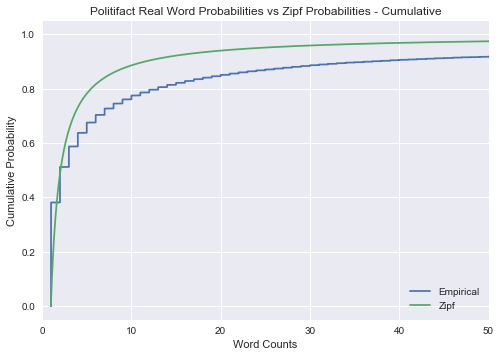

In [49]:
#visually compare distributions
plt.plot(emp_x_real, emp_y_real, label='Empirical')
plt.plot(zipf_x_real, zipf_y_real, label='Zipf')
plt.legend(loc='lower right')
plt.title('Politifact Real Word Probabilities vs Zipf Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])
plt.savefig('./Images/Zipf_real.png',format='png')

In [31]:
#genreate word counts, fake
df_fakecounts = data.wordcounts(df_pol_fake.text)
df_fakecounts.reset_index(drop=True,inplace=True)
total = df_fakecounts['counts'].sum()

In [32]:
#generate expected counts from zipf distribution
df_fakecounts['zipf_counts'] = pd.Series(total/(np.array(range(len(df_fakecounts)))+1)**1.07)
#scale zipf to empirical
scale_factor = df_fakecounts.counts[0] / df_fakecounts.zipf_counts[0]
df_fakecounts['zipf_counts'] = df_fakecounts['zipf_counts'] * scale_factor

In [33]:
df_fakecounts.head()

,word,counts,zipf_counts
0,the,6765,6765.000000
1,to,3413,3222.298028
2,of,2921,2088.084446
3,and,2812,1534.841771
4,a,2513,1208.842990


In [34]:
#generate ecdf's
emp_x_fake, emp_y_fake = data.ecdf(df_fakecounts.counts.values)
zipf_x_fake, zipf_y_fake = data.ecdf(df_fakecounts.zipf_counts.values)

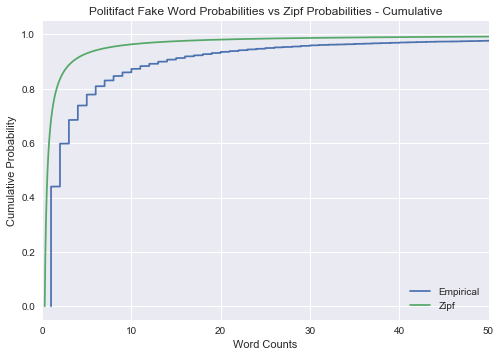

In [48]:
#visualize resutls
plt.plot(emp_x_fake, emp_y_fake, label='Empirical')
plt.plot(zipf_x_fake, zipf_y_fake, label='Zipf')
plt.legend(loc='lower right')
plt.title('Politifact Fake Word Probabilities vs Zipf Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])
plt.savefig('./Images/Zipf_fake.png',format='png')

(0, 50)

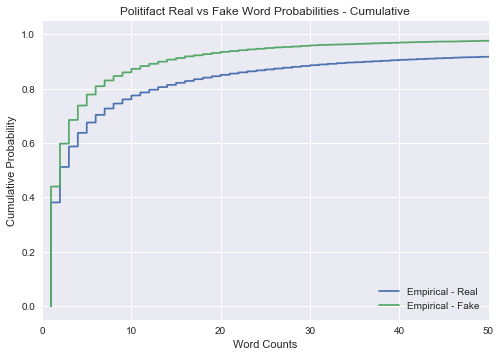

In [36]:
#visually compare empirical distributions to each other
plt.plot(emp_x_real, emp_y_real, label='Empirical - Real')
plt.plot(emp_x_fake, emp_y_fake, label='Empirical - Fake')
plt.legend(loc='lower right')
plt.title('Politifact Real vs Fake Word Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])

In [62]:
#use trapezoidal rule to evaluate the fit of the distributions 
#difference in area under the curve shows deviation from the Zipf, lower is better
real_fit = np.trapz(y=zipf_y_real,x=zipf_x_real) - np.trapz(y=emp_y_real,x=emp_x_real)
round(real_fit,2)

28.34

In [63]:
fake_fit = np.trapz(y=zipf_y_fake,x=zipf_x_fake) - np.trapz(y=emp_y_fake,x=emp_x_fake)
round(fake_fit,2)

5.85

Interestingly, both real and fake news from politifact track well with Zipf but not in any exact sense. Fake news appears to track Zipf closer than real, both visually and numerically from the trapezoidal rule. This is surprising since the expectation was to find that fake news does not follow the Zipf distribution since it is artificial use of language. Zipf's power law distribution may not be helpful in identifying real vs fake news. Let's give Machine Learning a try.

## Machine Learning

### Preprocessing

In [37]:
# #make tokenizer/vectorizer
# tokenizer = CountVectorizer(analyzer='word',token_pattern=r'\w+', stop_words=stopwords, min_df=2)
# #fit text
# tokenizer.fit(df.text)
# #transform
# fitted = tokenizer.transform(df.text)

### Multinomial Naive Bayes

In [38]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.naive_bayes import MultinomialNB

# # Convert to dense numpy array
# X = fitted.toarray()
# #make response variables
# y = df['class'].values
# #split testing and training data
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
# #instantiate naive bayes classifier
# clf = MultinomialNB()
# #fit data using vectorized words and compute cross validated score
# clf.fit(X_train,y_train)
# clf_score = np.mean(cross_val_score(clf,X_test,y_test,cv=5))

In [39]:
# clf_score

### Google BERT

## Conclusion